<a href="https://colab.research.google.com/github/Arash-Khosravi/Stock-Price-Prediction/blob/master/Stock_Price_Prediction_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description: LSTM(AI) to predict the stock price of 'Apple Inc', using last 60 days stock price.

In [2]:
#Import the libraries

import pandas as pd
import pandas_datareader as web
import numpy as np
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [3]:
# Getting the stock quote
df = web.DataReader('AMZN', data_source= 'yahoo', start='2012-01-01', end='2020-06-04')
# Show the Data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-05-29,321.149994,316.470001,319.250000,317.940002,38399500.0,317.940002
2020-06-01,322.350006,317.209991,317.750000,321.850006,20197800.0,321.850006
2020-06-02,323.440002,318.929993,320.750000,323.339996,21910700.0,323.339996


In [4]:
# Get the rows and columns in DF
df.shape

(2119, 6)

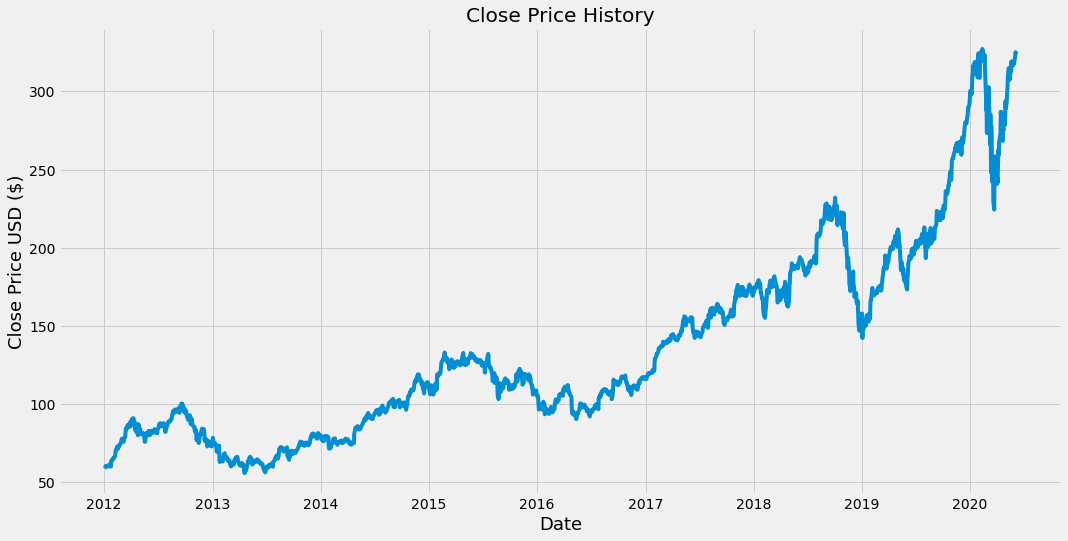

In [5]:
# Visualize the closing price

plt.figure(figsize=(24,15))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize= 18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
# Create the new df only with 'Close' Column
data = df.filter(['Close'])

# Convert the DataFrame to the numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)* 0.8)

training_data_len

1696

In [7]:
# Scaling the Data
scaler = MinMaxScaler(feature_range=(0,1))

# Fit & Transform data
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.01089548],
       [0.01205872],
       [0.01447467],
       ...,
       [0.98577792],
       [0.99233626],
       [0.98824656]])

In [8]:
# Create the training dataset

train_data = scaled_data[0: training_data_len, :]

# splitinf the data into x-train and y-train data
x_train=[]
y_train=[]


for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01089548, 0.01205872, 0.01447467, 0.01677483, 0.01642217,
       0.01721696, 0.01685378, 0.01624321, 0.01541158, 0.01798544,
       0.02030665, 0.01959081, 0.01566949, 0.01941185, 0.01572739,
       0.02954412, 0.02847562, 0.02987047, 0.03288645, 0.03471289,
       0.03456025, 0.03399706, 0.03639722, 0.03865526, 0.04121335,
       0.04534521, 0.05402475, 0.05415633, 0.05898825, 0.06259901,
       0.05639331, 0.05878296, 0.0587356 , 0.06543606, 0.06448335,
       0.06624662, 0.06941526, 0.07117856, 0.07625785, 0.07995811,
       0.08102658, 0.0814003 , 0.07507357, 0.07354712, 0.07377347,
       0.07972122, 0.08139505, 0.08499001, 0.09346428, 0.10477032,
       0.10265438, 0.10265964, 0.11083389, 0.11339195, 0.11157078,
       0.10990752, 0.10817582, 0.11392883, 0.11787649, 0.11952923])]
[0.11544472908538655]



In [9]:
# Convert the x and y train datasets to numpy
x_train, y_train = np.array(x_train), np.array(y_train)

x_train.shape


(1636, 60)

In [10]:
# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1636, 60, 1)

In [0]:
# Build the LSTM model

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [0]:
# compile the model
model.compile(optimizer= 'adam', loss='mean_squared_error')

In [13]:
# Traing the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
1636/1636 [==============================] - 73s 45ms/step - loss: 6.5574e-04
Epoch 2/5
1636/1636 [==============================] - 70s 43ms/step - loss: 2.7269e-04
Epoch 3/5
1636/1636 [==============================] - 71s 43ms/step - loss: 2.1675e-04
Epoch 4/5
1636/1636 [==============================] - 70s 43ms/step - loss: 1.6790e-04
Epoch 5/5
1636/1636 [==============================] - 71s 43ms/step - loss: 1.3501e-04


In [0]:
# Create the testing dataset
# Creating the new array containing scaled values fron index 1543 to 2003

test_data = scaled_data[training_data_len - 60:, :]

# Creating x and y test Datasets

x_test = []
y_test = dataset[training_data_len: , :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [15]:
# Converting the data to numpy array
x_test = np.array(x_test)
x_test.shape

(423, 60)

In [0]:
# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [0]:
# Get the models predicted price values

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


In [18]:
# Evaluating the model ( root mean squared error) ' RSME '
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.2375487920522126

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


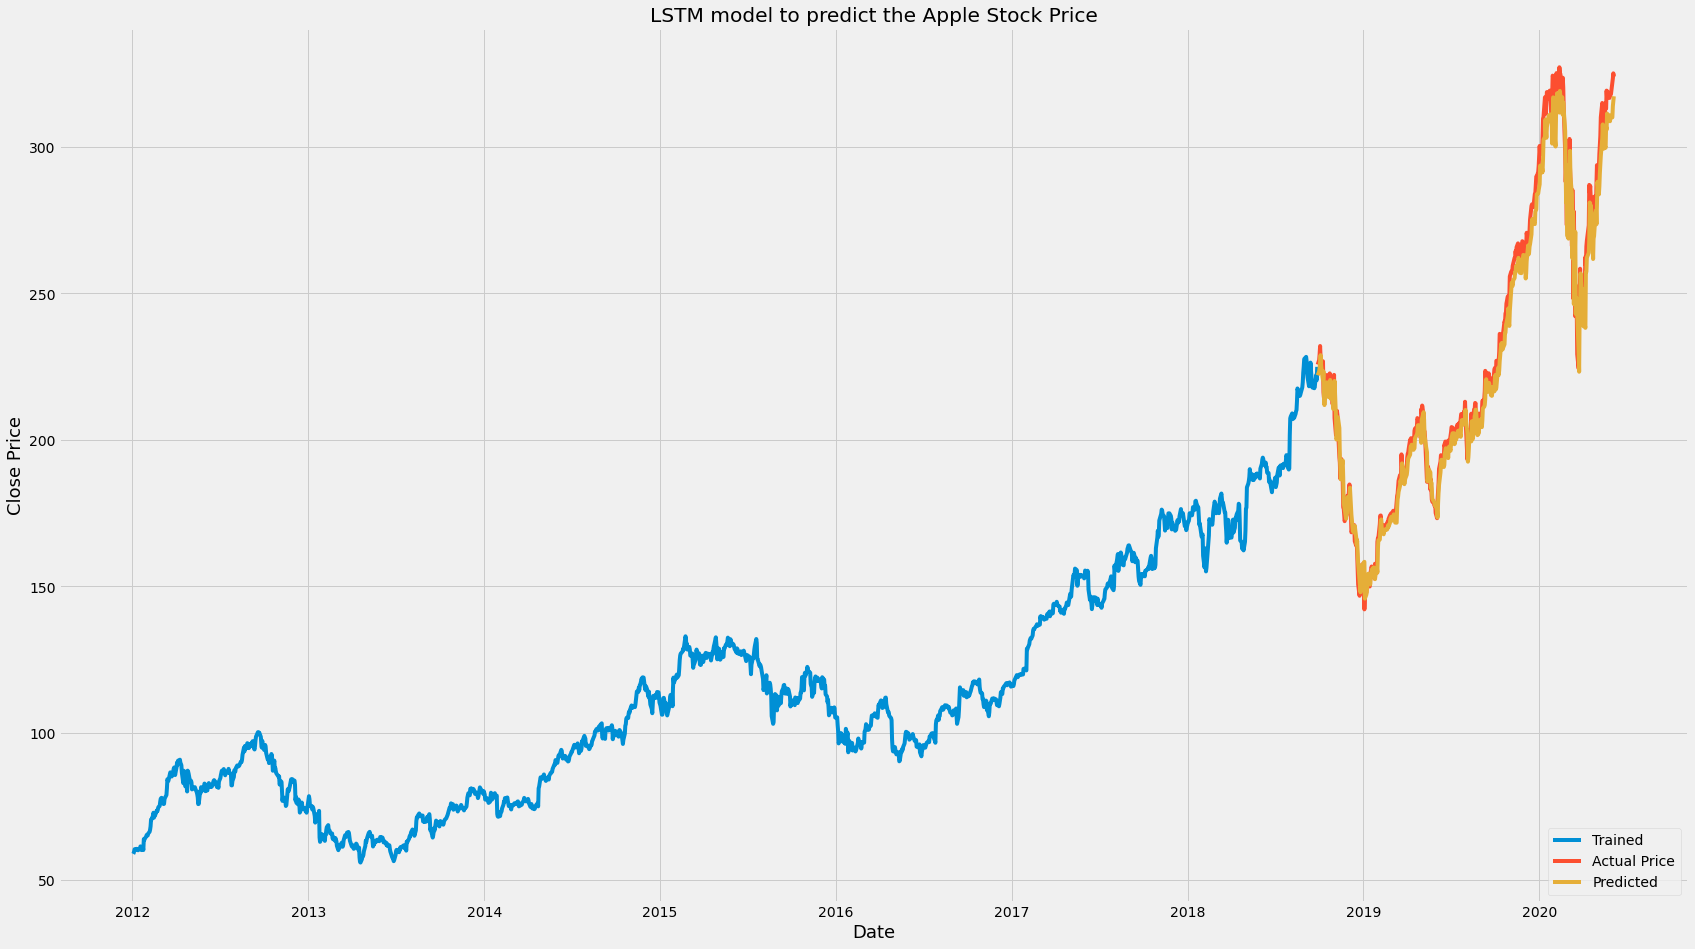

In [26]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data
plt.figure(figsize=(26,15))
plt.title('LSTM model to predict the Apple Stock Price')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Trained', 'Actual Price', 'Predicted'], loc='lower right')
plt.show()

In [20]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2018-09-28,225.740005,222.092407
2018-10-01,227.259995,223.372055
2018-10-02,229.279999,224.650848
2018-10-03,232.070007,226.410416
2018-10-04,227.990005,228.950119
...,...,...
2020-05-29,317.940002,310.303589
2020-06-01,321.850006,310.080322
2020-06-02,323.339996,313.926849


In [29]:
# Predict the close price of specific date
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-06-03')

#Create the new dataframe
new_df = apple_quote.filter(['Close'])

# Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# Scale the data to be values between 0 to 1
last_60_days_scaled = scaler.transform(last_60_days)

# Creating the empty list
X_test = []

# Append the past 60 days
X_test.append(last_60_days_scaled)

# Convert the X-test data set tp the numpy array
X_test = np.array(X_test)

# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[[317.29416]]


In [35]:
# Getting the actual price of the day 2020-06-03
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2020-06-03', end='2020-06-03')
print(f' Actual closed price for 03 Jun 2020: {apple_quote2["Close"]}')
print(f' predicted closed price for 03 Jun 2020: {pred_price}')

 Actual closed price for 03 Jun 2020: Date
2020-06-03    325.119995
Name: Close, dtype: float64
 predicted closed price for 03 Jun 2020: [[317.29416]]
